# Getting to know Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import os

## Data Loading

In [3]:
df = pd.read_csv('../inputs/train_labels.csv')

In [4]:
ss = pd.read_csv('../inputs/sample_submission.csv')

## data inside

In [5]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [6]:
df.label.value_counts()

0    130908
1     89117
Name: label, dtype: int64

<AxesSubplot:>

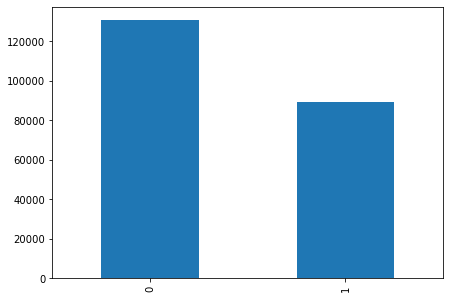

In [7]:
df.label.value_counts().plot(kind='bar',figsize=(7,5))

In [8]:
ss.head()

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0


## Few images

In [9]:
root_dir = os.path.dirname(os.getcwd())
train = True
if train:
    data_dir = os.path.join(root_dir,'inputs','train')
else:
    data_dir = os.path.join(root_dir,'inputs','test')    

In [10]:
import skimage.io as io

In [11]:
os.path.join(data_dir,df.id[0]+'.tif')

'/mnt/myssd/mylab/DATA_IMAGE/PROJECT_HISTOPATHO_CANCER_DETECTION/inputs/train/f38a6374c348f90b587e046aac6079959adf3835.tif'

In [12]:
io.available_plugins

{'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'gtk': ['imshow'],
 'tifffile': ['imread', 'imsave', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'fits': ['imread', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection']}

In [13]:
img = io.imread(os.path.join(data_dir,df.id[0]+'.tif'))

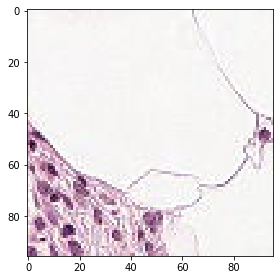

In [14]:
io.imshow(img)

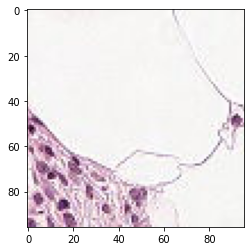

In [15]:
plt.imshow(img)

## PIL 

In [16]:
from PIL import Image

In [17]:
img_pil = Image.open(os.path.join(data_dir,df.id[0]+'.tif'))

In [18]:
type(img_pil)

PIL.TiffImagePlugin.TiffImageFile

In [19]:
# im.show()

## opencv

In [20]:
import cv2

In [21]:
img_cv = cv2.imread(os.path.join(data_dir,df.id[0]+'.tif'))

In [22]:
type(img_cv)

numpy.ndarray

In [25]:
# BGR2RGB
img_cv = cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)

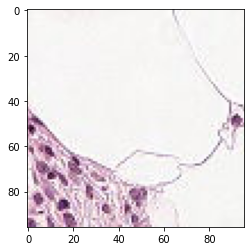

In [26]:
plt.imshow(img_cv)

In [28]:
img_cv.shape

(96, 96, 3)

In [30]:
np.transpose(img_cv,[2,0,1]).shape

(3, 96, 96)

In [31]:
# for pytorch
img_pt = img_cv.transpose([2,0,1])

In [41]:
img_pt.shape

(3, 96, 96)

In [48]:
np.expand_dims(img_pt,0).shape

(1, 3, 96, 96)